importing packages

In [11]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

## importing data

In [18]:
df = pd.read_json('https://github.com/Solvro/rekrutacja/raw/refs/heads/main/data/cocktail_dataset.json')

## data quality

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            134 non-null    int64 
 1   name          134 non-null    object
 2   category      134 non-null    object
 3   glass         134 non-null    object
 4   tags          35 non-null     object
 5   instructions  134 non-null    object
 6   imageUrl      134 non-null    object
 7   alcoholic     134 non-null    int64 
 8   createdAt     134 non-null    object
 9   updatedAt     134 non-null    object
 10  ingredients   134 non-null    object
dtypes: int64(2), object(9)
memory usage: 11.6+ KB


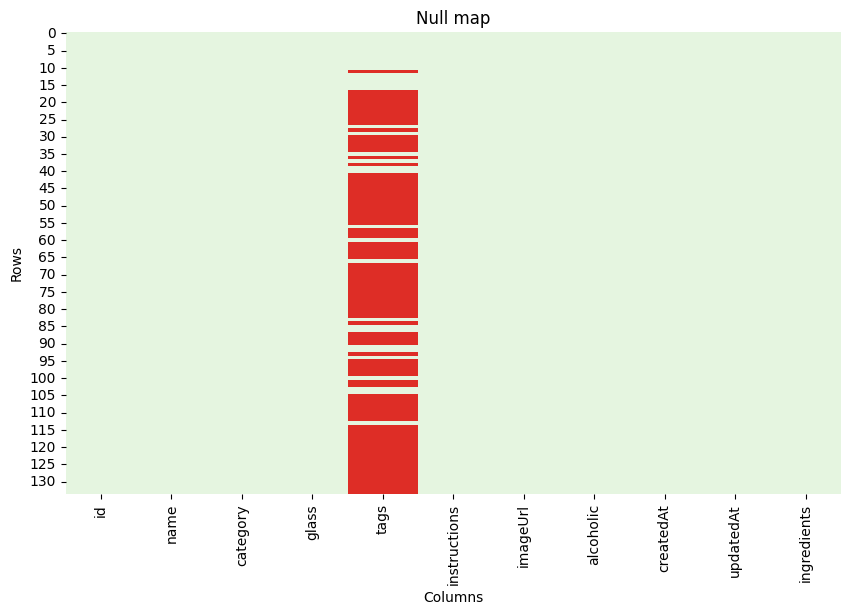

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."


In [19]:

df.info()
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.isna(),                # boolean mask of NaNs
    cmap=["#e5f5e0", "#de2d26"],  # present=greenish, missing=red (2-color)
    cbar=False                # hide colorbar (optional)
)
plt.title("Null map")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()
df.head()

Replaceing null values

In [20]:
df["tags"] = df["tags"].fillna("unknown") 

## data types

11 column  \
id : id (int64) \
name : nazwa (object) \
category : kategoria (object) \
glass : rodzaj kieliszka (object) \
tags : oznaczenia (object) \
instructions : jak przyrządzić (object) \
imageUrl :  link do zdjęcia (object) \
alcoholic : czy zawiera alkohol (object)\
createdAt : kiedy został dodany (object)\
updatedAt : kiedy został zaaktualizowany (object)\
ingredients : 

Wszystkie koktajle są alkoholowe, ta kolumna nie jest potrzebna \ tak samo jak image URL, nie korzystamy ze zdjęć

In [8]:
df = df.drop(columns = ['alcoholic'])
df = df.drop(columns = ['imageUrl'])

Po wstępnym przeglądzie widać, że wymagana jest zamiana typów danych \
category, glass na category \
createdAt, updatedAt na datetime

In [21]:

print(df['category'].unique())
print(df['glass'].unique())

df['category'] = df['category'].astype('category')
df['glass'] = df['glass'].astype('category')
#df['alcoholic'] = df['alcoholic'].astype('category')

['Cocktail' 'Ordinary Drink' 'Punch / Party Drink']
['Highball glass' 'Old-fashioned glass' 'Cocktail glass' 'Copper Mug'
 'Whiskey Glass' 'Collins glass' 'Pousse cafe glass' 'Champagne flute'
 'Whiskey sour glass' 'Brandy snifter' 'White wine glass']


## Wykresy

### Wykres ilosci drinków w zależności od kategorii

Wykres ilości kategorii drinków

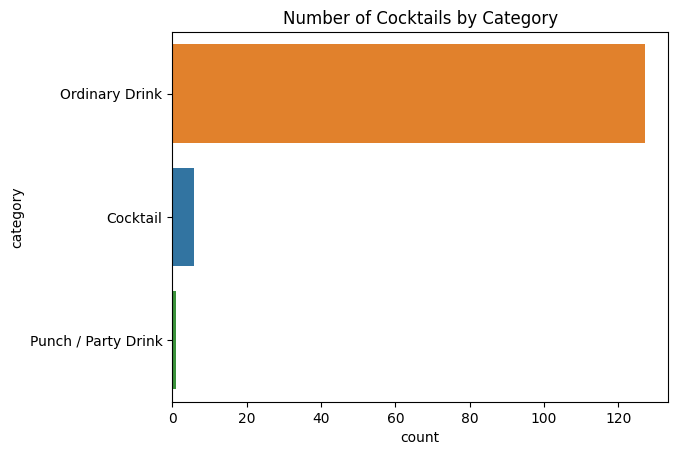

In [22]:
sns.countplot(y='category', data=df,hue='category', order=df['category'].value_counts().index)
plt.title('Number of Cocktails by Category')    
plt.show()

Znaczna większość drinków jest typu Ordinary Drink, co jest logiczne, jest to bardzo ogólna kategoria, która z pewnością odpowiada większości osób wpisujących

### Wykres ilości rodzajów szklanek

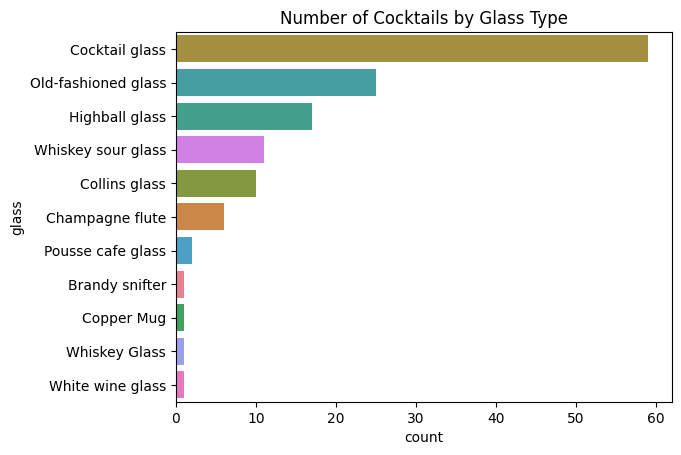

In [23]:
sns.countplot(data = df, \
            y = "glass",
            hue = "glass", \
            order = df['glass'].value_counts().index)
plt.title('Number of Cocktails by Glass Type')
plt.show()

Najwięcej drinków przygotowuej się w Cocktail Glass

In [24]:
result_path = Path.cwd().parent / "data" / "cocktails.csv"
df.to_csv(result_path, index=False)